In [1]:
import pandas as pd
import json
import os

In [2]:
participant_dfs = []
message_dfs = []
for filename in os.listdir('facebook-larachu18/messages/inbox'):
    filename = 'facebook-larachu18/messages/inbox/' + filename + '/message_1.json'
    with open(filename) as json_file:
        message = json.load(json_file)
        participants = message['participants']
        messages = message['messages']
        parts = pd.DataFrame.from_dict(participants)
        participant_dfs.append(parts)
        messages = pd.DataFrame.from_dict(messages)
        message_dfs.append(messages)

In [3]:
message_dfs_new = []
for df in message_dfs:
    if 'content' in df.columns:
        edited = df[['content', 'sender_name', 'timestamp_ms']]
        message_dfs_new.append(edited)

In [4]:
all_participants = pd.concat(participant_dfs)
all_participants['name'].value_counts().head(1)

Lara Chu    1582
Name: name, dtype: int64

In [5]:
all_messages = pd.concat(message_dfs_new)
all_messages['sender_name'].value_counts().head(1)

Lara Chu    193480
Name: sender_name, dtype: int64

In [6]:
def clean_messages(df, name):
    senders_messages = df[df['sender_name'] == name]
    senders_messages = senders_messages.dropna()
    senders_messages['content'] = senders_messages['content'].str.lower()
    senders_messages['content'] = senders_messages['content'].str.replace(pat="[^a-zA-Z\d\s]", repl="", regex=True)
    return senders_messages

cleaned = clean_messages(all_messages, 'Lara Chu')

In [7]:
cleaned_words = cleaned['content'].str.split(expand=True).stack()

In [8]:
word_counts = cleaned_words.value_counts()
word_counts.head(60)

i        50178
the      25649
to       25195
like     24515
u        23998
and      23021
a        18378
lol      18260
it       17271
im       12547
but      12369
just     11237
do       11210
so       11109
is       11076
in       10532
its       9873
for       9861
my        9212
haha      9066
have      8937
you       8747
yea       8560
of        7935
was       7829
we        7785
not       7365
that      7321
on        7161
what      7037
if        6920
me        6809
or        6781
can       6691
dont      6385
idk       6379
then      6341
be        6178
at        6129
with      5908
think     5828
go        5318
oh        5145
ok        4999
are       4990
ur        4974
get       4872
tho       4696
no        4547
this      4520
how       4297
up        4105
wait      4068
know      3936
one       3933
bc        3881
lmao      3853
they      3837
also      3589
wanna     3548
dtype: int64

In [9]:
most_common_words = ['the', 'be', 'to', 'a', 'of', 'in', 'and', 'that', 'have', 'i', 'it', 'for', 'not', 'on',
                    'with', 'he', 'as', 'you', 'do', 'at', 'this', 'but', 'his', 'by', 'from', 'they', 'we', 'say', 'her', 'she',
                    'or', 'an', 'will', 'my', 'one', 'all', 'would', 'there', 'their', 'what', 'so', 'up', 'out', 'if', 'about',
                    'who', 'which', 'get', 'go', 'me', 'when', 'make', 'can', 'like', 'time', 'no', 'just', 'him', 'know', 'take',
                    'people', 'into', 'year', 'your', 'good', 'some', 'could', 'them', 'see', 'other', 'than', 'then',
                    'now', 'look', 'only', 'come', 'its', 'over', 'think', 'also', 'back', 'after', 'use', 'two', 'how',
                    'our', 'work', 'first', 'well', 'way', 'even', 'new', 'want', 'because', 'any', 'these', 'give', 'day', 'most',
                    'us']

normal_speech = ['is', 'are', 'was', 'dont', 'because', 'im', 'too', 'did', 'didnt', 'ill', 'thats', 'got', 'theyre', 'where',
                'should', 'cant', 'theres', 'had', 'were', 'doesnt', 'ive', 'youre']

In [10]:
words_to_drop = most_common_words + normal_speech
noncommon = word_counts.drop(words_to_drop)
noncommon.head(60)

u           23998
lol         18260
haha         9066
yea          8560
idk          6379
oh           5145
ok           4999
ur           4974
tho          4696
wait         4068
bc           3881
lmao         3853
wanna        3548
kinda        3172
ppl          3058
okay         2944
gonna        2777
going        2594
much         2572
sorry        2500
ya           2497
r            2465
omg          2379
why          2322
rlly         2311
tht          2310
really       2196
more         2058
right        2055
mean         2006
need         1925
still        1808
stuff        1790
feel         1759
sure         1729
maybe        1663
same         1660
prob         1613
shit         1610
bad          1593
smth         1585
actually     1581
lool         1580
doing        1579
guys         1571
dude         1548
rn           1455
ask          1400
home         1396
nah          1370
o            1347
cuz          1335
tomorrow     1281
gotta        1266
uh           1265
has       

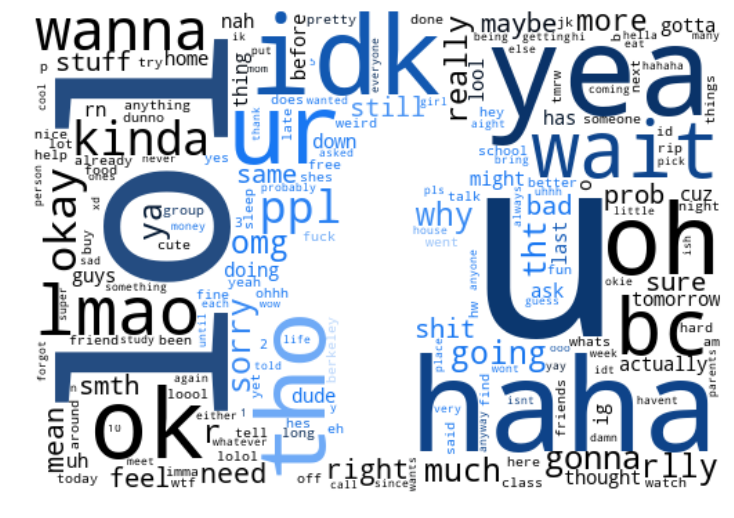

In [12]:
# !pip install wordcloud

import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

logo_mask = np.array(Image.open("Facebook-logo.png"))
image_colors = ImageColorGenerator(logo_mask)

wordcloud = WordCloud(background_color="white", mask=logo_mask)
d = noncommon.to_dict()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()